<h2><center>CSCI-UA 9473 Introduction to Machine Learning </center></h2>

<h3><center>Assignment 1: Gradient descent
 </center></h3>



__Given date:__ February 9

__Due date:__ February 21

__Total:__ 15pts

### Question 1. (5pts) Local vs global minimas and gradient descent

We consider the following function.

\begin{align}
F(x_1, x_2) =  3(1-x_1)^2\exp(-(x_1^2) - (x_2+1)^2)\\ 
   - 10(x_1/5 - x_1^3 - x_2^5)\exp(-x_1^2-x_2^2)\\
   - (1/3)\exp(-(x_1+1)^2 - x_2^2)
\end{align}

The surface plot of this function is given below together with its contour plot. The function has a single global minimum located near $(0.23, -1.62)$ and shown in red in the contour plot.

We want to implement gradient descent iterations on that function. Starting from a random initial point $(x_1, x_2)$, code the following updates 

\begin{align}
x_1^{(k+1)} = x_1^{(k)} - \eta * \text{grad}_{x_1} F(x_1, x_2)\\
x_2^{(k+1)} = x_2^{(k)} - \eta * \text{grad}_{x_2} F(x_1, x_2)
\end{align}

where $\text{grad}_{x_i}$ represents the gradient of $F(x_1, x_2)$ with respect to $x_i$. Choose a sufficiently small learning rate and plot the iterates (in white) on the contour plot. Repeat your experiments for various initial iterates.  

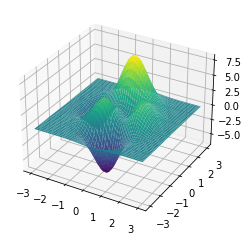

In [123]:
from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)


x1, x2 = np.meshgrid(x, y)

F = 3*(1-x1)**2 * np.exp(-(x1**2) - (x2+1)**2)\
   - 10*(np.true_divide(x1,5) - x1**3 - x2**5)*np.exp(-x1**2 - x2**2)\
   - np.true_divide(1,3)*np.exp(-(x1+1)**2 - x2**2)


# Plot the surface.
surf = ax.plot_surface(x1, x2, F, linewidth=0, alpha=1, cmap = 'viridis')
plt.show()



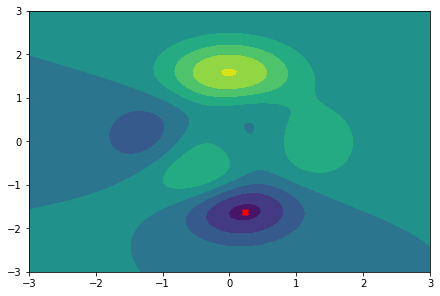

In [124]:
fig1, ax = plt.subplots(constrained_layout=True)
contour = ax.contourf(x1, x2, F,cmap = 'viridis')
plt.scatter(0.23, -1.62,c='r',marker='X')
plt.show()

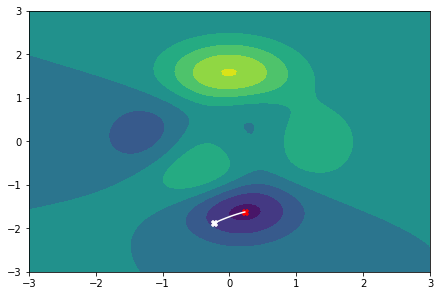

In [125]:
# put your solution here



beta0 = np.random.normal(0, 1, 1)
beta1 = np.random.normal(-1, 0.5, 1)

maxIter = 100
eta = 0.01

fig1, ax = plt.subplots(constrained_layout=True)
contour = ax.contourf(x1, x2, F,cmap = 'viridis')
plt.scatter(0.23, -1.62,c='r',marker='X')

plt.scatter(beta0, beta1, c='w', marker='X')

gradient_descent(beta0, beta1, maxIter, eta)


# function for determining the gradients of F_x1 and F_x2 respectively
def gradient_x1(x1, x2):
    fx1 = -6 * (1 - 2 * x1**2 + x1**3) * np.exp(-(x1**2) - (x2+1)**2)\
        - (2 - 34 * x1**2 + 20 * x1**4 + 20 * x1 * x2**5) * np.exp(-x1**2 - x2**2)\
        + np.true_divide(2,3) * (x1 + 1) * np.exp(-(x1+1)**2 - x2**2)
    return fx1

def gradient_x2(x1, x2):
    fx2 = -6 * ((1 - x1) ** 2) * (x2 + 1) * np.exp(-(x1**2) - (x2+1)**2)\
        -10 * (-5 * x2 ** 4 - 2 * x2 * (np.true_divide(x1, 5) - x1 ** 3 - x2 ** 5)) * np.exp(-x1**2 - x2**2)\
        + np.true_divide(2,3) * x2 * np.exp(-(x1+1)**2 - x2**2)
    return fx2



# function for iterating to find the minimas using gradient descent method
def gradient_descent(beta0, beta1, maxIter, eta):
    currIter = 0
    array0 = []
    array1 = []
    while currIter < maxIter:
        grad_beta0 = gradient_x1(beta0, beta1)
        grad_beta1 = gradient_x2(beta0, beta1)

        beta0 = beta0 - eta*grad_beta0
        beta1 = beta1 - eta*grad_beta1

        array0.append(beta0)
        array1.append(beta1)

        currIter += 1
    plt.plot(array0, array1, c='w')
    plt.show()



### Question 2. (5pts) Regression through the normal equations 

We consider the simple regression problem below, similar to the one discussed in class. 
Find the model that minimizes the sum of squares loss

\begin{align}
\ell(\boldsymbol \beta) = \frac{1}{2N}\sum_{i=1}^N (t_{\text{noisy}}^{(i)} -  (\beta_0 +\beta_1 x^{(i)}))^2
\end{align}

__using the Normal Equations__. To do this:

- Start by building the matrix $\tilde{\boldsymbol X}$ with
\begin{align}
\tilde{\boldsymbol X} = \left[\begin{array}{cc}
1 & x^{(1)} \\
\vdots & \vdots \\
1 & x^{(N)} \end{array}\right]
\end{align}
- Then compute the matrix $\tilde{\boldsymbol X}^T\tilde{\boldsymbol X}$ and the vector $\tilde{\boldsymbol X}^T\boldsymbol t$ where $\boldsymbol t = [t_{\text{noisy}}^{(1)}, \ldots , t^{(N)}_{\text{noisy}}]^T$

- Finally solve the equations through

\begin{align}
\boldsymbol \beta_{\text{OLS}} = \left(\tilde{\boldsymbol X}^T\tilde{\boldsymbol X}\right)^{-1}(\tilde{\boldsymbol X}^T\boldsymbol t) 
\end{align}

using the function __np.linalg.inv__ from the linear algebra package. Plot the result in green on top of the plot below and compare with the true (blue) (unknown) model.  


[0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
 3.33333333 3.88888889 4.44444444 5.        ]
[0.31418025 0.5600284 ]


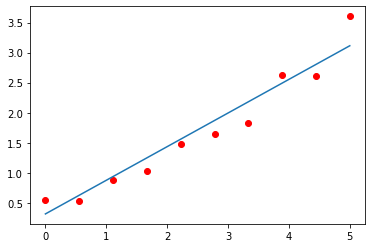

In [126]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,5,10)
noise = np.random.normal(0,.3,len(x))


beta_true = np.random.normal(0,1,2)

print(x)
print(beta_true)

t = beta_true[0] + beta_true[1]*x

tnoisy = t+noise

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.show()




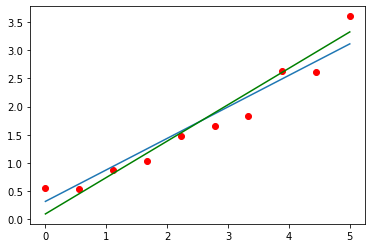

In [127]:
# put your code here
plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)

# all 1's
ones = np.ones((len(x), 1))

# stack 1's with x to form X_tilda_matrix `X`
X = np.hstack((ones, x.reshape(-1, 1)))

# reshape X_tilda_matrix to form X_tilda_matrix_transpose `Xt`
Xt = X.reshape(-1, len(x))

# matrix multiply X_tilda_matrix_transpose and X_tilda_matrix to get `Xt_X`
Xt_X = np.matmul(Xt, X)

# get the inverse of Xt_X: `Xt_X_inv`
Xt_X_inv = np.linalg.inv(Xt_X)

# matrix multiply X_transpose and tnoisy to get `Xt_t`
Xt_t = np.matmul(Xt, tnoisy)

# matrix multiply inverse of Xt_X and Xt_t to get `beta_OLS`
beta_OLS = np.matmul(Xt_X_inv, Xt_t)

# print(beta_true)
# print(beta_OLS)

t_OLS = beta_OLS[0] + beta_OLS[1]*x

plt.plot(x, t_OLS, c='g')
plt.show()


### Question 3 [5pts]. Successive orthogonalization

We once again consider the dataset from Question 2. This time we will focus on an extended model containing not only the original features but also order 2 and 3 monomials in those features. 

We want to rely on _successive orthogonalization_ to derive the regression vector $\mathbf{\beta}$. 

Let $\tilde{\mathbf{X}}$ denote the feature matrix, with first column being the vector $[1,1,...,1]$, second column being the original feature vector $x$, third column containing the degree two monomials, and so on.

Starting with $\mathbf{z}_0 = \mathbf{c}_0$ (the first column of $\tilde{\mathbf{X}}$), successive orthogonalization of the columns $\mathbf{c}_j$ of $\tilde{\mathbf{X}}$ can be encoded as follows

1. Initialize $\mathbf{z}_0 = \mathbf{c}_0$



2. For j=1,2,..., D

    Compute the coefficient $\hat{\gamma}_{\ell,j}$ for $\ell=0,..., j-1$ as
     
    $$\hat{\gamma}_{\ell, j} = \frac{\langle \mathbf{z}_\ell, \mathbf{c}_j\rangle }{\langle \mathbf{z}_\ell, \mathbf{z}_\ell\rangle}$$
    
    And define the new column $\mathbf{z}_j$ as 
    
    $$\mathbf{z}_j = \mathbf{c}_j - \sum_{k=0}^{j-1}\hat{\gamma}_{kj}\mathbf{z}_k\quad \quad (*)$$


Once we have all the $\mathbf{z}_j's$ we can compute the projection of the (noisy) target vector $\mathbf{t}_{\varepsilon}$ onto each $\mathbf{z}_j$ as 
$\langle \mathbf{z}_j, \mathbf{t}_{\varepsilon}\rangle/\langle\mathbf{z}_j,\mathbf{z}_j \rangle$

Since the $\mathbf{z}_{D+1}$ is the only $\mathbf{z}_j$ that contains $\mathbf{x}_{D+1}$ this gives us the coefficient $\hat{\beta}_{D+1}$. I.e. 

$$\hat{\beta}_{D+1} =  \frac{\langle \mathbf{z}_{D+1}, \mathbf{t}_{\varepsilon}\rangle }{\langle\mathbf{z}_{D+1},\mathbf{z}_{D+1} \rangle} $$

The remaining $\hat{\beta}_j$ can be derived by using the recursion (*) on the $\mathbf{z}_j$, projecting the target vector $\mathbf{t}_{\varepsilon}$ on $\mathbf{z}_j$ and expressing $\mathbf{z}_j$ from the recursion as a linear combination of the $\mathbf{c}_j$

Implement a function that realizes successive orthogonalization and returns the vector of regression weights $\mathbf{\beta}$. 

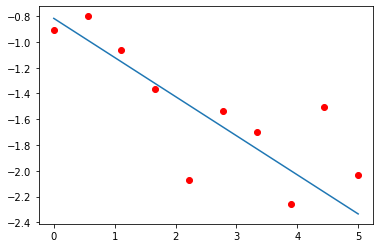

In [128]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,5,10)

noise = np.random.normal(0,.3,len(x))
beta_true = np.random.normal(0,1,2)

t = beta_true[0] + beta_true[1]*x

tnoisy = t+noise

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.show()

In [129]:
ones = np.ones((len(x), 1))

squared_x = np.square(x)
cubed_x = np.power(x, 3)

# stack 1's with x, x^2, x^3 to form X_tilda_matrix `X`
X = np.hstack((ones, x.reshape(-1, 1), squared_x.reshape(-1, 1), cubed_x.reshape(-1, 1)))

coef = list()
c = list()
beta = list()

c_0 = X[:, 0]
z_0 = c_0

c.append(c_0)


for j in range(1, len(X[0])):
    for l in range(j-1):
        c_0_t = np.transpose(c_0)
        j_0 = X[:, j]
        coefficient = np.matmul(c_0_t, j_0) / np.matmul(c_0_t, c_0) 
        coef.append(coefficient)
        c_0 = j_0 - np.sum(np.dot(coef, c))
        c.append(c_0)

for ele in c:
    ele_t = np.transpose(ele)
    ele_t_t = np.matmul(ele_t, tnoisy)
    magnitude = np.matmul(ele_t, ele)
    projection = ele_t_t/magnitude
    beta.append(projection)
        
print(beta)


[-1.5237062487685826, 0.01861276222941414, 0.0041452357660571445, 0.002303384713551158]
